In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.ndimage import median_filter
from typing import List, Tuple
from edges_analysis import read_step
from edges_cal.xrfi import detrend_medfilt, flagged_filter, robust_divide
from edges_analysis.analysis import filters
from edges_cal.modelling import Polynomial

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Total Power Filter

### Create the Filter

In [3]:
path = Path('/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/')

In [4]:
files = sorted(path.glob("*.h5"))

In [5]:
tp_aggregator = filters.TotalPowerAggregator(
    band = (50, 100)
)

In [36]:
tp_filt, info = filters.get_gha_model_filter(
    data=files[:50],
    aggregator=tp_aggregator,
    metric_model_type = 'fourierday',
    std_model_type = 'fourierday',
    metric_model_kwargs = {'n_terms': 40},
    std_model_kwargs = {'n_terms': 40},
    detrend_metric_model = Polynomial(n_terms=5),
    detrend_std_model = Polynomial(n_terms=5),
    detrend_gha_chunk_size=2,
)

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064358112>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-290-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064357936>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-291-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064358200>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064358112>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-340-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064358640>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-341-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064358112>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064357408>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-314-15.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064435408>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-315-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064435848>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064538688>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-339-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064110328>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-340-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064110768>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

### Inspect the Filter

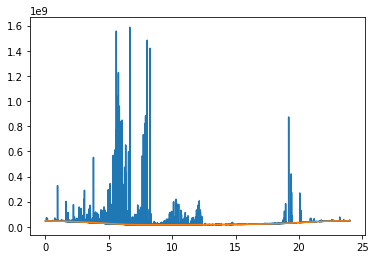

In [37]:
plt.plot(info.gha, info.metric)
plt.plot(info.gha, tp_filt.metric_model(info.gha))

(-1425794.98829104, 1425794.98829104)

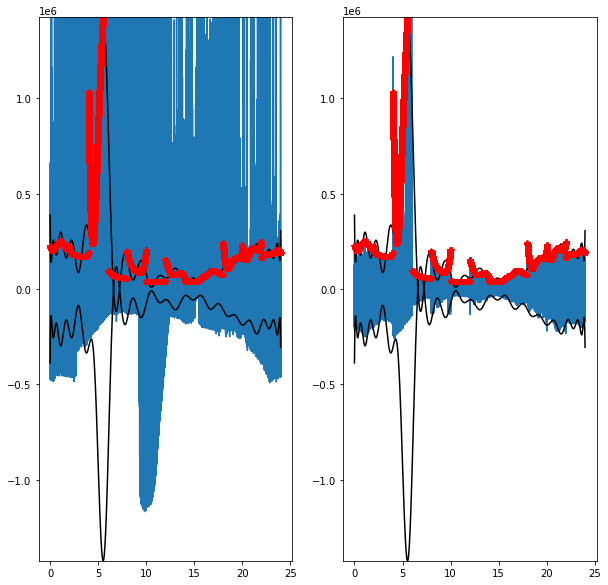

In [38]:
nsig = 3
fig, ax = plt.subplots(1,2, figsize=(10,10))
plt.sca(ax[0])
plt.plot(info.gha, info.metric - tp_filt.metric_model(info.gha))
plt.plot(info.gha, nsig*tp_filt.std_model(info.gha), color='k')
plt.plot(info.gha, -nsig*tp_filt.std_model(info.gha), color='k')
plt.plot(info.gha, nsig*info.std, 'r*')
plt.ylim((-nsig*tp_filt.std_model(info.gha)).min(), nsig*tp_filt.std_model(info.gha).max())

plt.sca(ax[1])
plt.plot(info.gha, np.where(info.flags, np.nan, info.metric - tp_filt.metric_model(info.gha)))
plt.plot(info.gha, nsig*tp_filt.std_model(info.gha), color='k')
plt.plot(info.gha, -nsig*tp_filt.std_model(info.gha), color='k')
plt.plot(info.gha, nsig*info.std, 'r*')
plt.ylim((-nsig*tp_filt.std_model(info.gha)).min(), nsig*tp_filt.std_model(info.gha).max())


Let's see how many integrations that are flagged in the iterative step are NOT flagged by the global fit:

In [39]:
np.sum(info.flags)

12404

In [24]:
np.sum(info.flags & ~tp_filt.apply_filter(info.gha, info.metric)), len(info.gha)

(0, 29219)

And vice versa:

In [25]:
np.sum(tp_filt.apply_filter(info.gha, info.metric) & ~info.flags)

0

These are less than 1% of the integrations, which is probably reasonable. 

Now look at this filter applied to other data:

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064056064>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-315-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064056152>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-315-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140453064056064>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/St

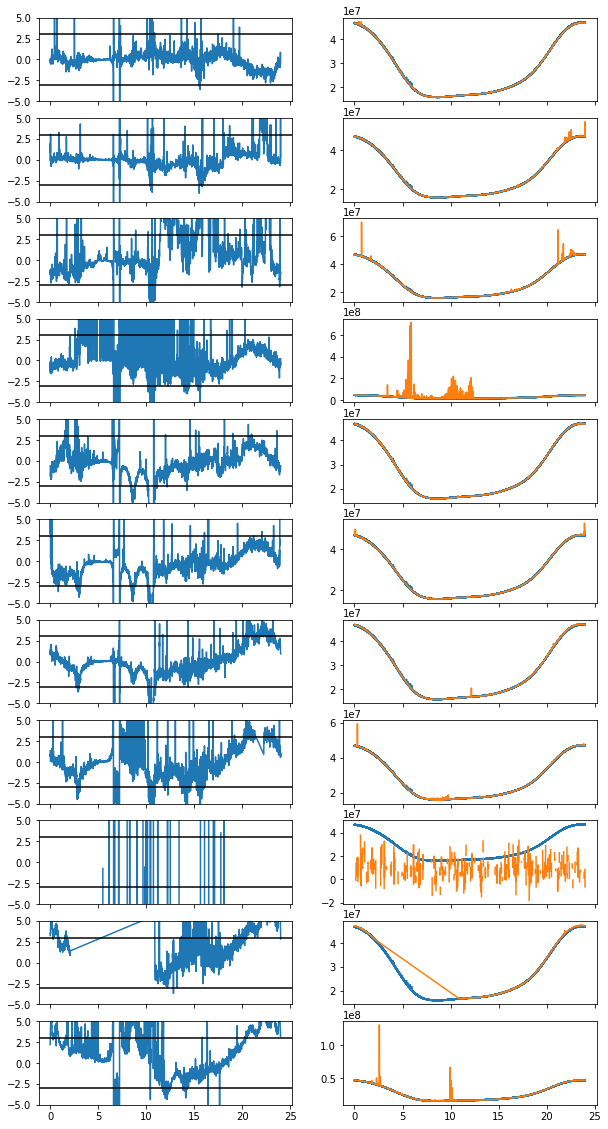

In [41]:
fig, ax = plt.subplots(11, 2, sharex=True, figsize=(10, 20))

for i, fl in enumerate(files[15::10]):
    gha, metric = tp_aggregator.aggregate([fl])
    flags = tp_filt.apply_filter(gha, metric)
    
    ax[i, 0].plot(gha, (metric - tp_filt.metric_model(gha))/tp_filt.std_model(gha))
    ax[i, 0].axhline(3, color='k')
    ax[i, 0].axhline(-3, color='k')
    ax[i, 0].set_ylim(-5, 5)
    
    ax[i, 1].plot(info.gha, np.where(info.flags, np.nan, info.metric))
    ax[i, 1].plot(gha, metric)

The problem here is that there seems to be evolution over the course of a year or so in the total power. If instead we just use all observations to create the dataset:

### Try using all files in the filter

In [6]:
tp_filt_all, info_all = filters.get_gha_model_filter(
    data=files,
    aggregator=tp_aggregator,
    metric_model_type = 'fourierday',
    std_model_type = 'fourierday',
    metric_model_kwargs = {'n_terms': 40},
    std_model_kwargs = {'n_terms': 40},
#    detrend_metric_model = Polynomial(n_terms=5),
#    detrend_std_model = Polynomial(n_terms=5),
#    detrend_gha_chunk_size=2,
)

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617576079032>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-290-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617576078856>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-291-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617576079032>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617576079032>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-324-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617576079032>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-325-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617576078768>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617576078768>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-363-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617576078592>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-364-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617576078856>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139621004005312>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2017-083-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139621004005312>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2017-084-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139621004005312>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617576077800>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-302-14.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617576279824>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-303-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617576279912>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617575069656>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-335-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617575069832>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-336-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617575070360>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617575176768>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-357-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617574760696>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-357-07.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617574761136>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617574865296>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2017-014-06.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617574865472>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2017-015-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617574865824>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617574564088>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2017-082-08.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617574564264>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2017-083-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617574564792>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

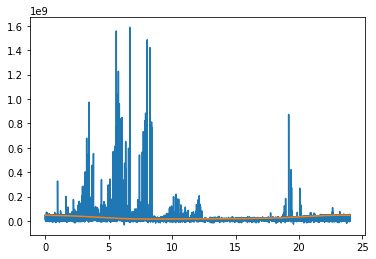

In [7]:
plt.plot(info_all.gha, info_all.metric)
plt.plot(info_all.gha, tp_filt_all.metric_model(info_all.gha))

In [8]:
tp_filt_all.std_model.parameters

array([-1.28264264e+10, -4.68021329e+10,  4.99827528e+10,  3.26495904e+09,
        5.06488219e+10,  5.89193575e+10, -4.27492446e+10, -4.31644873e+10,
        6.68970224e+10,  7.57280533e+10, -1.78074511e+10,  5.97845406e+10,
       -9.20443137e+10, -2.43651323e+10, -8.58860500e+10, -1.22991908e+11,
        4.89362136e+10, -8.85122631e+10,  1.68168553e+11,  1.38850666e+11,
       -3.82344528e+10,  2.93006505e+10,  3.97639831e+09,  1.04088430e+11,
       -1.95898291e+11, -2.09805365e+11,  1.45284787e+11,  4.63955915e+10,
        3.49700308e+10,  6.86608835e+10, -6.55903439e+10, -4.42912531e+10,
        2.18237707e+10,  7.53358195e+09, -1.23122631e+09,  3.66219753e+08,
       -3.38380243e+08, -1.37776340e+08,  3.29588234e+07,  3.94140312e+06])

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139621003317760>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-315-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617576077360>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-315-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139621003317760>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/St

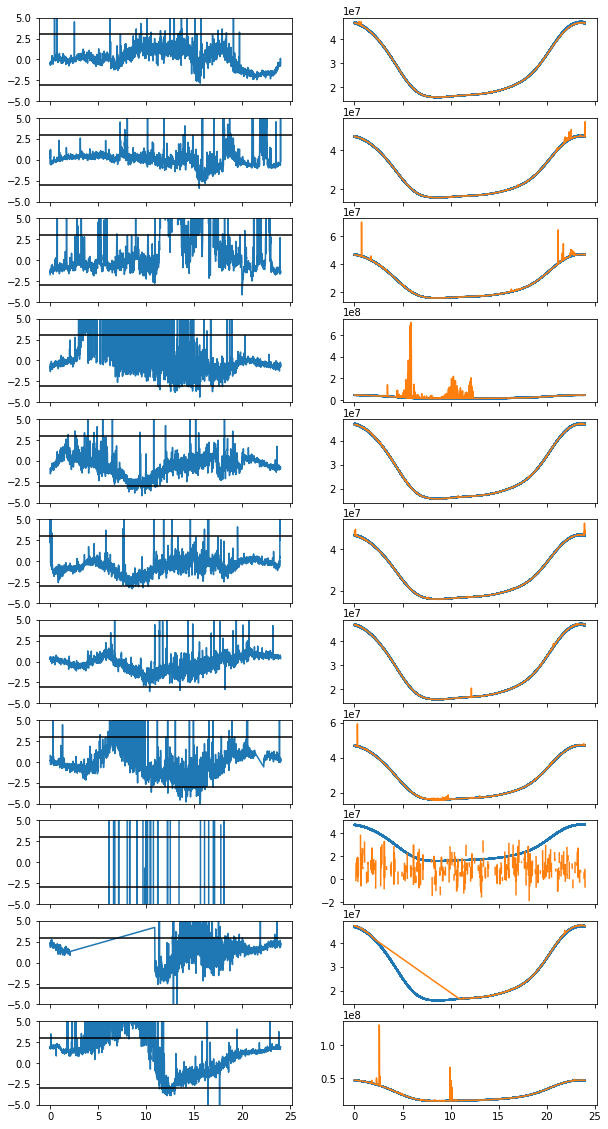

In [9]:
fig, ax = plt.subplots(11, 2, sharex=True, figsize=(10, 20))

for i, fl in enumerate(files[15::10]):
    gha, metric = tp_aggregator.aggregate([fl])
    flags = tp_filt_all.apply_filter(gha, metric)
    
    ax[i, 0].plot(gha, (metric - tp_filt_all.metric_model(gha))/tp_filt_all.std_model(gha))
    ax[i, 0].axhline(3, color='k')
    ax[i, 0].axhline(-3, color='k')
    ax[i, 0].set_ylim(-5, 5)
    
    ax[i, 1].plot(info_all.gha, np.where(info_all.flags, np.nan, info_all.metric))
    ax[i, 1].plot(gha, metric)

This definitely does better at the later times, and isn't prohibitively slow.

## RMS Filter

### Create the Filter

In [10]:
rms_aggregator = filters.RMSAggregator(
    band = (50, 100),
    model_type='linlog',
    model_kwargs = {"n_terms": 5}
)

In [11]:
rms_filt, rms_info = filters.get_gha_model_filter(
    data=files[:10],
    aggregator=rms_aggregator,
    metric_model_type = 'fourierday',
    std_model_type = 'fourierday',
    metric_model_kwargs = {'n_terms': 40},
    std_model_kwargs = {'n_terms': 40},
    detrend_metric_model = Polynomial(n_terms=5),
    detrend_std_model = Polynomial(n_terms=5),
    detrend_gha_chunk_size=2,
)

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617566114040>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-290-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617566113952>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-291-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617566114480>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

### Inspect the Filter

[autoreload of edges_analysis.analysis.filters failed: Traceback (most recent call last):
  File "/home/smurray/miniconda3/envs/edges/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/smurray/miniconda3/envs/edges/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/smurray/miniconda3/envs/edges/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/smurray/miniconda3/envs/edges/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/data4/smurray/Projects/radio/EOR/Edges/edges-analysis/src/edges_analysis/analysis/filters.py", lin

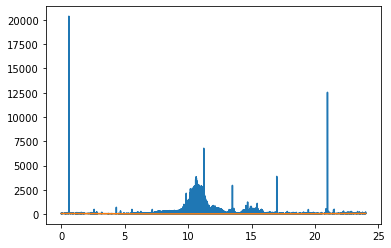

In [12]:
plt.plot(rms_info.gha, rms_info.metric)
plt.plot(rms_info.gha, rms_filt.metric_model(rms_info.gha))

[autoreload of edges_analysis.analysis.filters failed: Traceback (most recent call last):
  File "/home/smurray/miniconda3/envs/edges/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/smurray/miniconda3/envs/edges/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/smurray/miniconda3/envs/edges/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/smurray/miniconda3/envs/edges/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/home/smurray/miniconda3/envs/edges/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = new
  File "/home/smurray/miniconda3/envs/edges/lib/python3.7/site-packages/attr/_make.py", line 

(-5.25276411880111, 5.25276411880111)

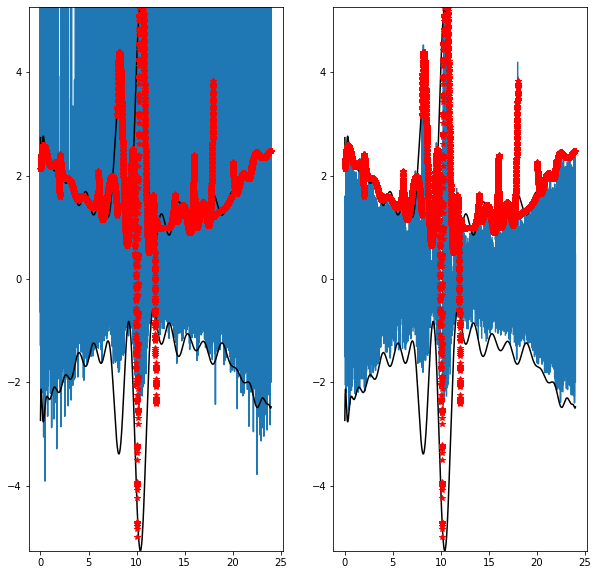

In [13]:
nsig = 3
fig, ax = plt.subplots(1,2, figsize=(10,10))
plt.sca(ax[0])
plt.plot(rms_info.gha, rms_info.metric - rms_filt.metric_model(rms_info.gha))
plt.plot(rms_info.gha, nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, -nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, nsig*rms_info.std, 'r*')
plt.ylim((-nsig*rms_filt.std_model(rms_info.gha)).min(), nsig*rms_filt.std_model(rms_info.gha).max())

plt.sca(ax[1])
plt.plot(rms_info.gha, np.where(rms_info.flags, np.nan, rms_info.metric - rms_filt.metric_model(rms_info.gha)))
plt.plot(rms_info.gha, nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, -nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, nsig*rms_info.std, 'r*')
plt.ylim((-nsig*rms_filt.std_model(rms_info.gha)).min(), nsig*rms_filt.std_model(rms_info.gha).max())


This is not particularly good: the red dots are negative sometimes, which means that flagging will be very poor at times. 

In [15]:
np.sum(rms_info.flags), len(rms_info.flags)

(6010, 21084)

About 1/3 of the integrations are flagged, which is also probably not quite reasonable. 

### Try with global filter (no chunks)

In [16]:
rms_filt, rms_info = filters.get_gha_model_filter(
    data=files[:10],
    aggregator=rms_aggregator,
    metric_model_type = 'fourierday',
    std_model_type = 'fourierday',
    metric_model_kwargs = {'n_terms': 40},
    std_model_kwargs = {'n_terms': 40},
#     detrend_metric_model = Polynomial(n_terms=5),
#     detrend_std_model = Polynomial(n_terms=5),
#     detrend_gha_chunk_size=2,
)

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617540094968>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-290-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617540094880>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-291-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617540095232>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

(-2.945018890334083, 2.945018890334083)

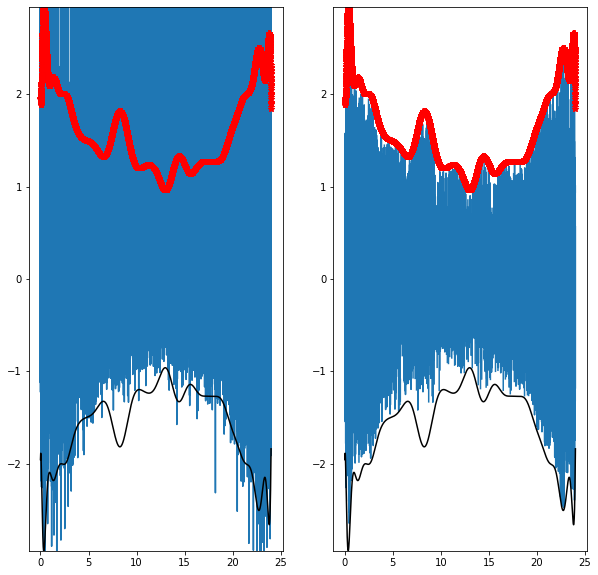

In [17]:
nsig = 3
fig, ax = plt.subplots(1,2, figsize=(10,10))
plt.sca(ax[0])
plt.plot(rms_info.gha, rms_info.metric - rms_filt.metric_model(rms_info.gha))
plt.plot(rms_info.gha, nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, -nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, nsig*rms_info.std, 'r*')
plt.ylim((-nsig*rms_filt.std_model(rms_info.gha)).min(), nsig*rms_filt.std_model(rms_info.gha).max())

plt.sca(ax[1])
plt.plot(rms_info.gha, np.where(rms_info.flags, np.nan, rms_info.metric - rms_filt.metric_model(rms_info.gha)))
plt.plot(rms_info.gha, nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, -nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, nsig*rms_info.std, 'r*')
plt.ylim((-nsig*rms_filt.std_model(rms_info.gha)).min(), nsig*rms_filt.std_model(rms_info.gha).max())


In [18]:
np.sum(rms_info.flags)

6131

This is still a lot of flags, but at least the inferred std is reasonable. 

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617539628288>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-315-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139619171119880>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-315-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 139617575338584>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/St

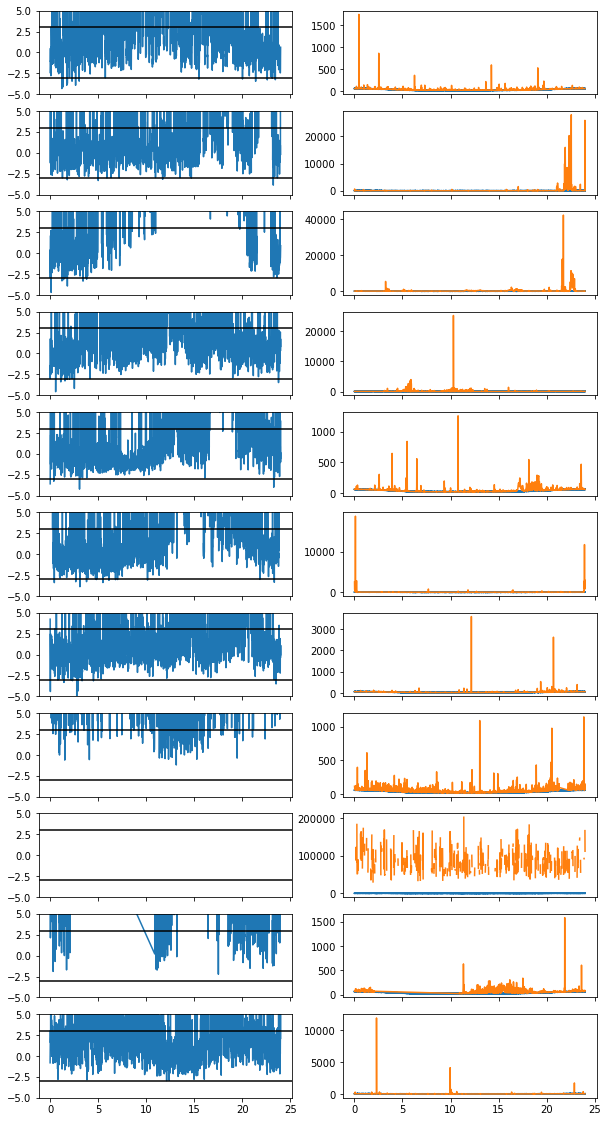

In [19]:
fig, ax = plt.subplots(11, 2, sharex=True, figsize=(10, 20))

for i, fl in enumerate(files[15::10]):
    gha, metric = rms_aggregator.aggregate([fl])
    flags = rms_filt.apply_filter(gha, metric)
    
    ax[i, 0].plot(gha, (metric - rms_filt.metric_model(gha))/rms_filt.std_model(gha))
    ax[i, 0].axhline(3, color='k')
    ax[i, 0].axhline(-3, color='k')
    ax[i, 0].set_ylim(-5, 5)
    
    ax[i, 1].plot(rms_info.gha, np.where(rms_info.flags, np.nan, rms_info.metric))
    ax[i, 1].plot(gha, metric)